In [15]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic

# For webcam input:
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = holistic.process(image)
    print(results)
    break
cap.release()


<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt

In [16]:
face = pd.DataFrame()
pose = pd.DataFrame()
left_hand= pd.DataFrame()
right_hand = pd.DataFrame()

if results.face_landmarks:
    for i, point in enumerate(results.face_landmarks.landmark):
        face.loc[i, ['x','y','z']] = [point.x, point.y, point.z]
if results.pose_landmarks:
    for i, point in enumerate(results.pose_landmarks.landmark):
        pose.loc[i, ['x','y','z']] = [point.x, point.y, point.z]
if results.left_hand_landmarks:
    for i, point in enumerate(results.left_hand_landmarks.landmark):
        left_hand.loc[i, ['x','y','z']] = [point.x, point.y, point.z]
if results.right_hand_landmarks:
    for i, point in enumerate(results.right_hand_landmarks.landmark):
        right_hand.loc[i, ['x','y','z']] = [point.x, point.y, point.z]
    
# landmarks['y'] = -landmarks['y']

<Axes: xlabel='x', ylabel='y'>

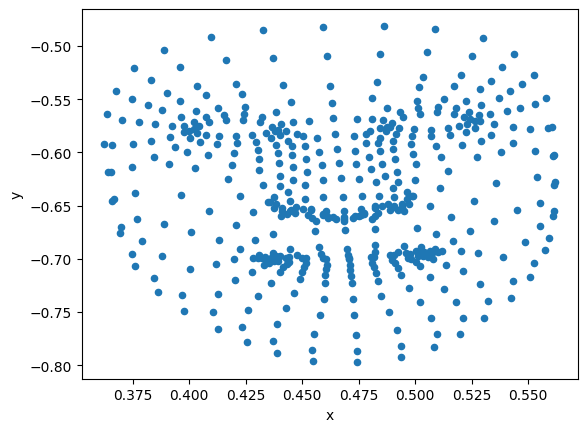

In [22]:
landmarks['y'] = -landmarks['y']
landmarks.plot(x='x',y='y',kind='scatter')

<Axes: xlabel='x', ylabel='y'>

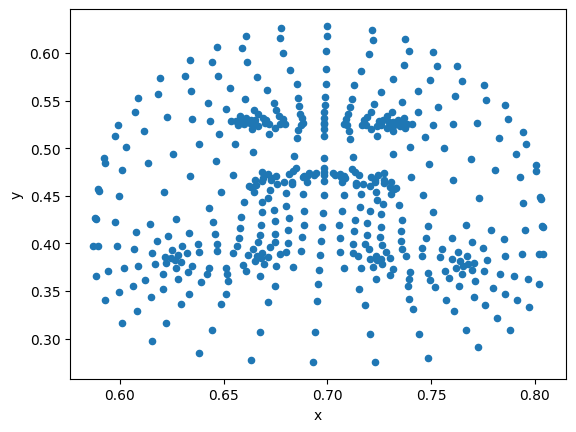

In [24]:
face.plot(x='x',y='y',kind='scatter')

In [18]:
train = pd.read_csv("D:/ASL/train.csv")
xyz = pd.read_parquet("D:/ASL/train_landmark_files/28656/1460359.parquet")

In [20]:
ROWS_PER_FRAME = 543

def load_relevant_data_subset(pq_path):
    data_columns = ['x', 'y', 'z']
    data = pd.read_parquet(pq_path, columns=data_columns)
    n_frames = int(len(data) / ROWS_PER_FRAME)
    data = data.values.reshape(n_frames, ROWS_PER_FRAME, len(data_columns))
    return data.astype(np.float32)

(126519, 7)

In [27]:
landmarks = pd.DataFrame()

In [42]:
def create_frame_landmarks_df(results, frame):
    xyz_skel = xyz.query('frame == 83')[['type','landmark_index']].drop_duplicates().reset_index(drop=True).copy()
    
    face = pd.DataFrame()
    pose = pd.DataFrame()
    left_hand= pd.DataFrame()
    right_hand = pd.DataFrame()

    if results.face_landmarks:
        for i, point in enumerate(results.face_landmarks.landmark):
            face.loc[i, ['x','y','z']] = [point.x, point.y, point.z]
    if results.pose_landmarks:
        for i, point in enumerate(results.pose_landmarks.landmark):
            pose.loc[i, ['x','y','z']] = [point.x, point.y, point.z]
    if results.left_hand_landmarks:
        for i, point in enumerate(results.left_hand_landmarks.landmark):
            left_hand.loc[i, ['x','y','z']] = [point.x, point.y, point.z]
    if results.right_hand_landmarks:
        for i, point in enumerate(results.right_hand_landmarks.landmark):
            right_hand.loc[i, ['x','y','z']] = [point.x, point.y, point.z]

    face = face.reset_index().rename(columns={'index':'landmark_index'}).assign(type='face')
    pose = pose.reset_index().rename(columns={'index':'landmark_index'}).assign(type='pose')
    left_hand = left_hand.reset_index().rename(columns={'index':'landmark_index'}).assign(type='left_hand')
    right_hand = right_hand.reset_index().rename(columns={'index':'landmark_index'}).assign(type='right_hand')

    landmarks = pd.concat([face, pose, left_hand, right_hand]).reset_index(drop=True)
    
    landmarks = xyz_skel.merge(landmarks, on=['type','landmark_index'], how='left')
    landmarks = landmarks.assign(frame = frame)
    return landmarks

In [44]:
landmarks = create_frame_landmarks_df(results, 0)

In [45]:
landmarks[(landmarks['type'] == 'left_hand')]

,type,landmark_index,x,y,z,frame
468,left_hand,0,NaN,NaN,NaN,0
469,left_hand,1,NaN,NaN,NaN,0
470,left_hand,2,NaN,NaN,NaN,0
471,left_hand,3,NaN,NaN,NaN,0
472,left_hand,4,NaN,NaN,NaN,0
473,left_hand,5,NaN,NaN,NaN,0
474,left_hand,6,NaN,NaN,NaN,0
475,left_hand,7,NaN,NaN,NaN,0
476,left_hand,8,NaN,NaN,NaN,0
477,left_hand,9,NaN,NaN,NaN,0
